# Gopi Chand Yenikapalli Data Mining Assignment -1

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
# Importing data file
df = pd.read_csv('assignment01_data.csv')

In [4]:
# Viewing imported data set first 10 rows
df.head(10)

,TARGET,X1,X2,X3,X4,X5
0,344.2,4330,9965,2436,6,A
1,412.6,5190,6590,3108,10,B
2,330.1,4152,7500,2294,8,A
3,498.6,6272,13773,5032,9,A
4,331.5,4170,5000,2370,7,A
5,337.4,4244,5142,2124,6,C
6,359.4,4521,5000,3220,7,A
7,320.4,4030,10000,2208,6,A
8,333.5,4195,6835,2582,5,B
9,409.4,5150,5093,4818,8,A


In [6]:
# Exploring number of rows and columns
rows = df.shape[0]
cols = df.shape[1]
print(f"Rows={rows} and Cols={cols}")

Rows=5802 and Cols=6


# standardize each continuous variable (used Sklearn StandardScaler)


In [7]:
#Identify and Handle Any Missing Data
df.isna().sum()

TARGET    0
X1        0
X2        0
X3        0
X4        0
X5        0
dtype: int64

In [8]:
df_new = df
df_new
#standardize the values for each predictor variable
# feom Sklearn import standardSclar for standardize values 
df_x = df_new[['X1', 'X2', 'X3', 'X4']]
from sklearn.preprocessing import  StandardScaler

sc = StandardScaler()
df[['X1', 'X2', 'X3', 'X4']] = pd.DataFrame(sc.fit_transform(df_x), 
                       index= df_x.index, columns= df_x.columns)
df[['X1', 'X2', 'X3', 'X4']]

,X1,X2,X3,X4
0,-0.488550,1.381138,-0.553046,-0.692039
1,0.200806,0.116845,0.207214,2.090505
2,-0.631230,0.457736,-0.713696,0.699233
3,1.068112,2.807634,2.383909,1.394869
4,-0.616802,-0.478777,-0.627714,0.003597
...,...,...,...,...
5797,0.122252,0.181277,-0.374295,1.394869
5798,0.153513,1.172483,-0.577935,-0.692039
5799,0.139085,0.344605,-0.503267,0.003597
5800,-0.846854,0.229227,-1.046310,-1.387675


In [9]:
df[['X1', 'X2', 'X3', 'X4']].mean()

X1   -1.626490e-16
X2   -1.237855e-16
X3   -4.447207e-16
X4   -1.765593e-15
dtype: float64

In [10]:
df[['X1', 'X2', 'X3', 'X4']].std()

X1    1.000086
X2    1.000086
X3    1.000086
X4    1.000086
dtype: float64

In [11]:
df_new

,TARGET,X1,X2,X3,X4,X5
0,344.2,-0.488550,1.381138,-0.553046,-0.692039,A
1,412.6,0.200806,0.116845,0.207214,2.090505,B
2,330.1,-0.631230,0.457736,-0.713696,0.699233,A
3,498.6,1.068112,2.807634,2.383909,1.394869,A
4,331.5,-0.616802,-0.478777,-0.627714,0.003597,A
...,...,...,...,...,...,...
5797,404.8,0.122252,0.181277,-0.374295,1.394869,B
5798,407.9,0.153513,1.172483,-0.577935,-0.692039,A
5799,406.5,0.139085,0.344605,-0.503267,0.003597,A
5800,308.7,-0.846854,0.229227,-1.046310,-1.387675,A


# Converting categorical data into dummy variables

In [12]:
df_dummies = pd.get_dummies(df_new, prefix='X5_', prefix_sep='', 
                            columns=['X5'])
df_dummies.head()

,TARGET,X1,X2,X3,X4,X5_A,X5_B,X5_C
0,344.2,-0.488550,1.381138,-0.553046,-0.692039,1,0,0
1,412.6,0.200806,0.116845,0.207214,2.090505,0,1,0
2,330.1,-0.631230,0.457736,-0.713696,0.699233,1,0,0
3,498.6,1.068112,2.807634,2.383909,1.394869,1,0,0
4,331.5,-0.616802,-0.478777,-0.627714,0.003597,1,0,0


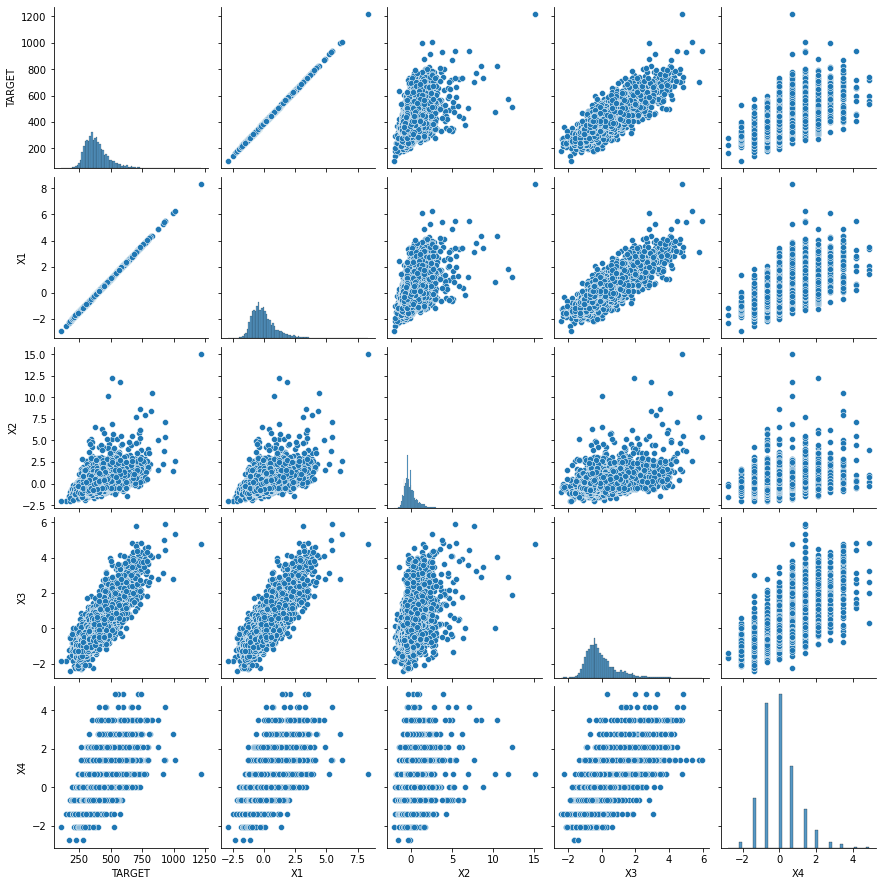

In [13]:
#Explore the relationships between the variables using pairplot from the seaborn library (often referred to as a correlogram).
sns.pairplot(df)
plt.show()

In [14]:
df_new

,TARGET,X1,X2,X3,X4,X5
0,344.2,-0.488550,1.381138,-0.553046,-0.692039,A
1,412.6,0.200806,0.116845,0.207214,2.090505,B
2,330.1,-0.631230,0.457736,-0.713696,0.699233,A
3,498.6,1.068112,2.807634,2.383909,1.394869,A
4,331.5,-0.616802,-0.478777,-0.627714,0.003597,A
...,...,...,...,...,...,...
5797,404.8,0.122252,0.181277,-0.374295,1.394869,B
5798,407.9,0.153513,1.172483,-0.577935,-0.692039,A
5799,406.5,0.139085,0.344605,-0.503267,0.003597,A
5800,308.7,-0.846854,0.229227,-1.046310,-1.387675,A


In [15]:
column_list = list(df.columns)
column_list.remove('TARGET')
column_list.remove('X5')
X = df[column_list] # store  X (input) values in X
y = df['TARGET'] # store target values in y

In [16]:
X

,X1,X2,X3,X4
0,-0.488550,1.381138,-0.553046,-0.692039
1,0.200806,0.116845,0.207214,2.090505
2,-0.631230,0.457736,-0.713696,0.699233
3,1.068112,2.807634,2.383909,1.394869
4,-0.616802,-0.478777,-0.627714,0.003597
...,...,...,...,...
5797,0.122252,0.181277,-0.374295,1.394869
5798,0.153513,1.172483,-0.577935,-0.692039
5799,0.139085,0.344605,-0.503267,0.003597
5800,-0.846854,0.229227,-1.046310,-1.387675


In [17]:
y

0       344.2
1       412.6
2       330.1
3       498.6
4       331.5
        ...  
5797    404.8
5798    407.9
5799    406.5
5800    308.7
5801    447.6
Name: TARGET, Length: 5802, dtype: float64

# multivariable linear regression model

In [18]:
 multivariable_lin_reg=LinearRegression().fit(X,y)

In [19]:
multivariable_lin_reg

LinearRegression()

# coefficients and R square score.

In [20]:
print(f"Y = {multivariable_lin_reg.intercept_:.4f} + {multivariable_lin_reg.coef_[0]:.4f} X1 + {multivariable_lin_reg.coef_[1]:.6f} X2 + {multivariable_lin_reg.coef_[2]:.6f} X3 + {multivariable_lin_reg.coef_[3]:.6f} X4")
print(f"coefficient of determination: {multivariable_lin_reg.score(X, y):.8f}")

Y = 392.6857 + 99.1686 X1 + 0.000463 X2 + 0.000437 X3 + -0.000521 X4
coefficient of determination: 0.99999995


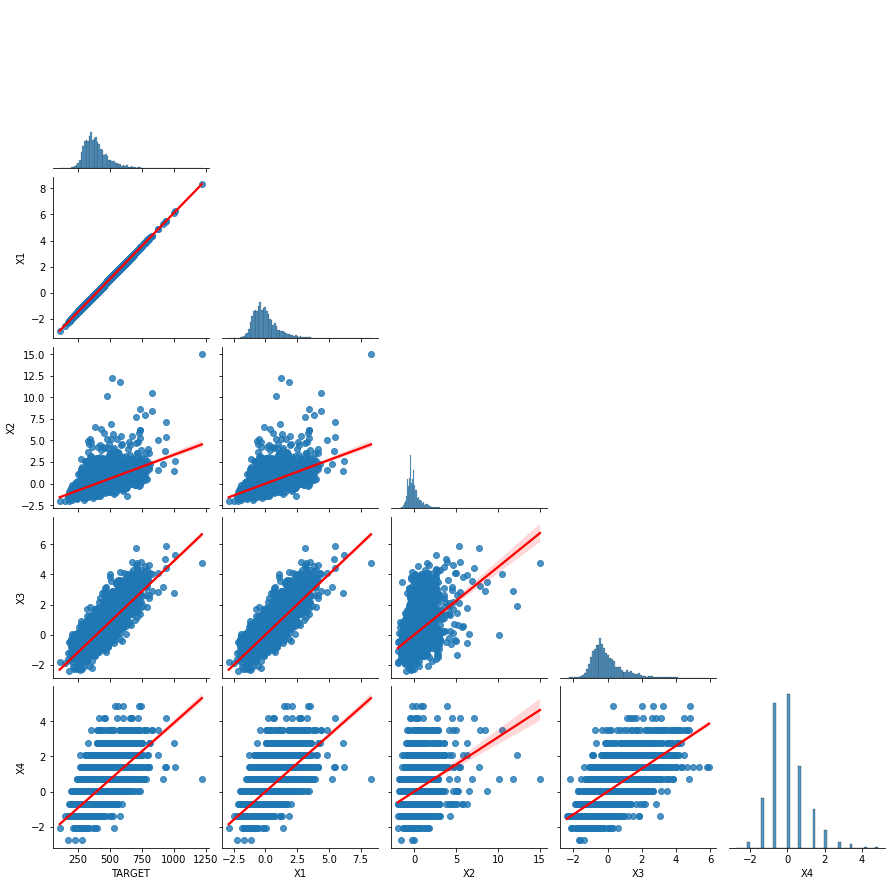

In [21]:
#scatter plot diagram with regression lines included.
#correlogram or correlation matrix
g = sns.pairplot(df_new, kind="reg", corner=True, plot_kws={'line_kws':{'color':'red'}})


The most important column is the first column. by observing column 1 plots X2,X3 and X4 Notice that X1, X3, and X4 seem to have a strong relationship (this is indicated by the steep slope), but X1 seems overfit to given data. Also, note that in the set of coefficients of the multivaraiable linear model, X2,X3 and X4 has the lowest coefficient, and the X1 is much higher. The size of the coefficient will generally indicate the strength of the variables effect on the target. so X1 influence model highly but it overfits.

In [22]:
df_new.corr()

,TARGET,X1,X2,X3,X4
TARGET,1.000000,1.000000,0.546123,0.800519,0.638539
X1,1.000000,1.000000,0.546120,0.800518,0.638542
X2,0.546123,0.546120,1.000000,0.448880,0.308395
X3,0.800519,0.800518,0.448880,1.000000,0.651501
X4,0.638539,0.638542,0.308395,0.651501,1.000000


In [23]:
df_dummies.corr()

,TARGET,X1,X2,X3,X4,X5_A,X5_B,X5_C
TARGET,1.000000,1.000000,0.546123,0.800519,0.638539,-0.217711,0.228764,0.041721
X1,1.000000,1.000000,0.546120,0.800518,0.638542,-0.217713,0.228764,0.041724
X2,0.546123,0.546120,1.000000,0.448880,0.308395,-0.047831,0.038864,0.022750
X3,0.800519,0.800518,0.448880,1.000000,0.651501,-0.163679,0.150675,0.056777
X4,0.638539,0.638542,0.308395,0.651501,1.000000,-0.149754,0.139214,0.050327
X5_A,-0.217711,-0.217713,-0.047831,-0.163679,-0.149754,1.000000,-0.728076,-0.576336
X5_B,0.228764,0.228764,0.038864,0.150675,0.139214,-0.728076,1.000000,-0.140580
X5_C,0.041721,0.041724,0.022750,0.056777,0.050327,-0.576336,-0.140580,1.000000


In [24]:
#Using statsmodels linear regression (Just For checking purpose)
import statsmodels.api as sm

#fit linear regression model
model = sm.OLS(y, X).fit()

#view model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 TARGET   R-squared (uncentered):                   0.060
Model:                            OLS   Adj. R-squared (uncentered):              0.059
Method:                 Least Squares   F-statistic:                              92.44
Date:                Sun, 11 Sep 2022   Prob (F-statistic):                    2.53e-76
Time:                        14:00:34   Log-Likelihood:                         -42888.
No. Observations:                5802   AIC:                                  8.578e+04
Df Residuals:                    5798   BIC:                                  8.581e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------